<a href="https://colab.research.google.com/github/Geberty/USTspecialTopics2026spring/blob/main/assignment_2_MNIST_in_Keras_test_if_Seven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

In [2]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import to_categorical                         # NumPy related tools

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [3]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Task BINARY CLASSIFICATION
Adapt the existing MNIST multi-class classification model to perform binary classification, specifically to predict whether a digit is '7' or not '7'. This involves preparing binary labels, modifying the model's output layer and activation function, recompiling the model with an appropriate loss function for binary classification, and adjusting the interpretation of predictions.

## Prepare Binary Labels

### Subtask:
Transform the `y_train` and `y_test` arrays to binary labels: 1 if the digit is '7', and 0 otherwise. This involves modifying the existing label arrays directly.


**Reasoning**:
The subtask requires transforming the `y_train` and `y_test` arrays into binary labels (1 if the digit is '7', 0 otherwise). This can be achieved by applying a boolean condition and casting the result to an integer type.



In [5]:
y_train_binary = (y_train == 7).astype(int)
y_test_binary = (y_test == 7).astype(int)

print("First 10 y_train values (original):", y_train[:10])
print("First 10 y_train_binary values:", y_train_binary[:10])
print("First 10 y_test values (original):", y_test[:10])
print("First 10 y_test_binary values:", y_test_binary[:10])

First 10 y_train values (original): [5 0 4 1 9 2 1 3 1 4]
First 10 y_train_binary values: [0 0 0 0 0 0 0 0 0 0]
First 10 y_test values (original): [7 2 1 0 4 1 4 9 5 9]
First 10 y_test_binary values: [1 0 0 0 0 0 0 0 0 0]


## Modify Model Output Layer

### Subtask:
Adjust the final `Dense` layer in the model to have 1 neuron and change its activation function from `softmax` to `sigmoid`, which is appropriate for binary classification.


**Reasoning**:
The subtask requires modifying the model's output layer for binary classification. This involves re-initializing the model, adding the hidden layers as before, but changing the final Dense layer to have 1 neuron and a 'sigmoid' activation function. The provided instructions outline these steps clearly, so I will implement them sequentially in a single code block.



In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1)) # Output layer for binary classification with 1 neuron
model.add(Activation('sigmoid')) # Sigmoid activation for binary classification
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,089 (2.54 MB)

 Trainable params: 665,089 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous output included a `UserWarning` about passing `input_shape` directly to the `Dense` layer in a `Sequential` model. To adhere to best practices and eliminate the warning, I will modify the model definition to explicitly use an `Input` layer as the first layer.



In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the Binary Classification Model

### Subtask:
Train the newly compiled binary classification model using the `X_train` (reshaped and normalized) and `y_train_binary` labels. Use a `batch_size` of 128 and train for 5 `epochs`.

#### Instructions:
1. Use the `model.fit()` method to train the model.
2. Pass `X_train` as the input data and `y_train_binary` as the target labels.
3. Set `batch_size=128`.
4. Set `epochs=5`.
5. Keep `verbose=1` to see the training progress.

**Reasoning**:
Following the instructions, I will now train the binary classification model using the `model.fit()` method with the specified training data, binary labels, batch size, and number of epochs.



In [8]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


**Reasoning**:
The input data (`X_train` and `X_test`) has been correctly reshaped and normalized. Now that the data is in the expected format, I will re-attempt to train the binary classification model using the `model.fit()` method.



In [9]:
model.fit(X_train, y_train_binary,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9732 - loss: 0.0789
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9938 - loss: 0.0202
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9955 - loss: 0.0147
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9965 - loss: 0.0102
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9971 - loss: 0.0082


In [10]:
score = model.evaluate(X_test, y_test_binary)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9942 - loss: 0.0220
Test score: 0.018211741000413895
Test accuracy: 0.995199978351593


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


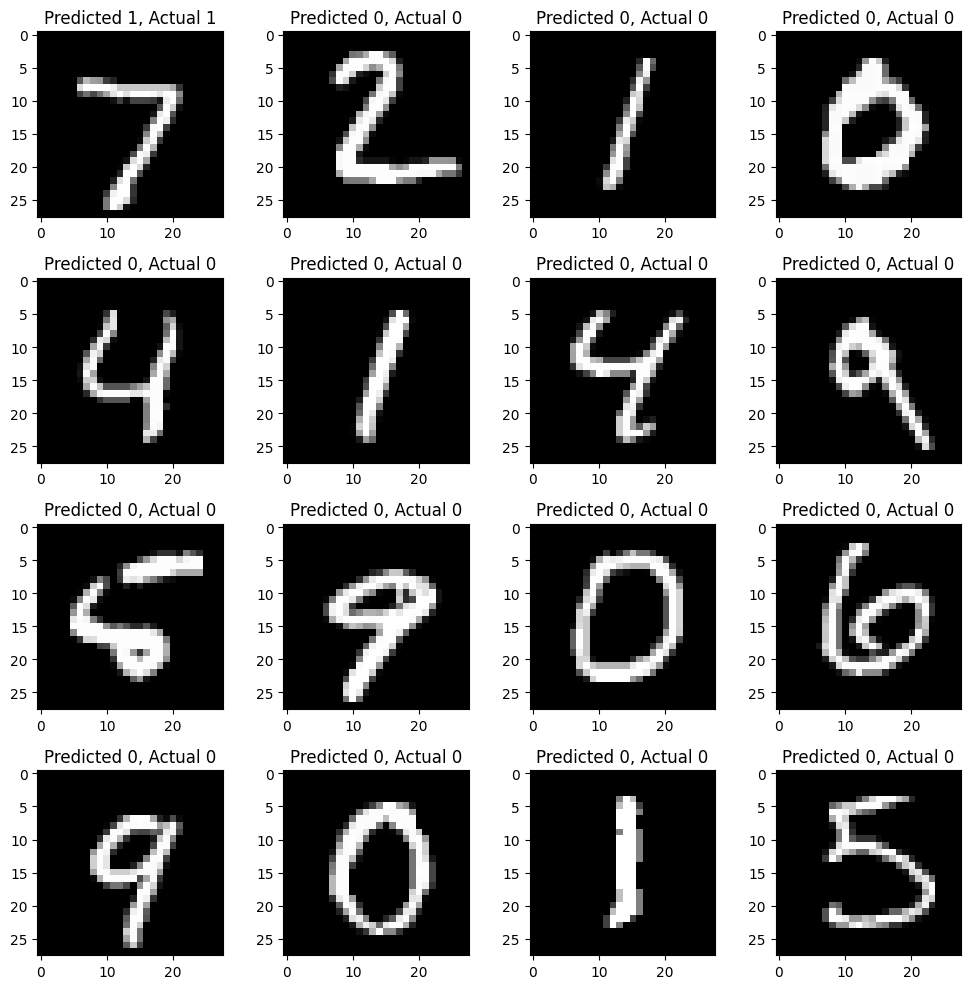

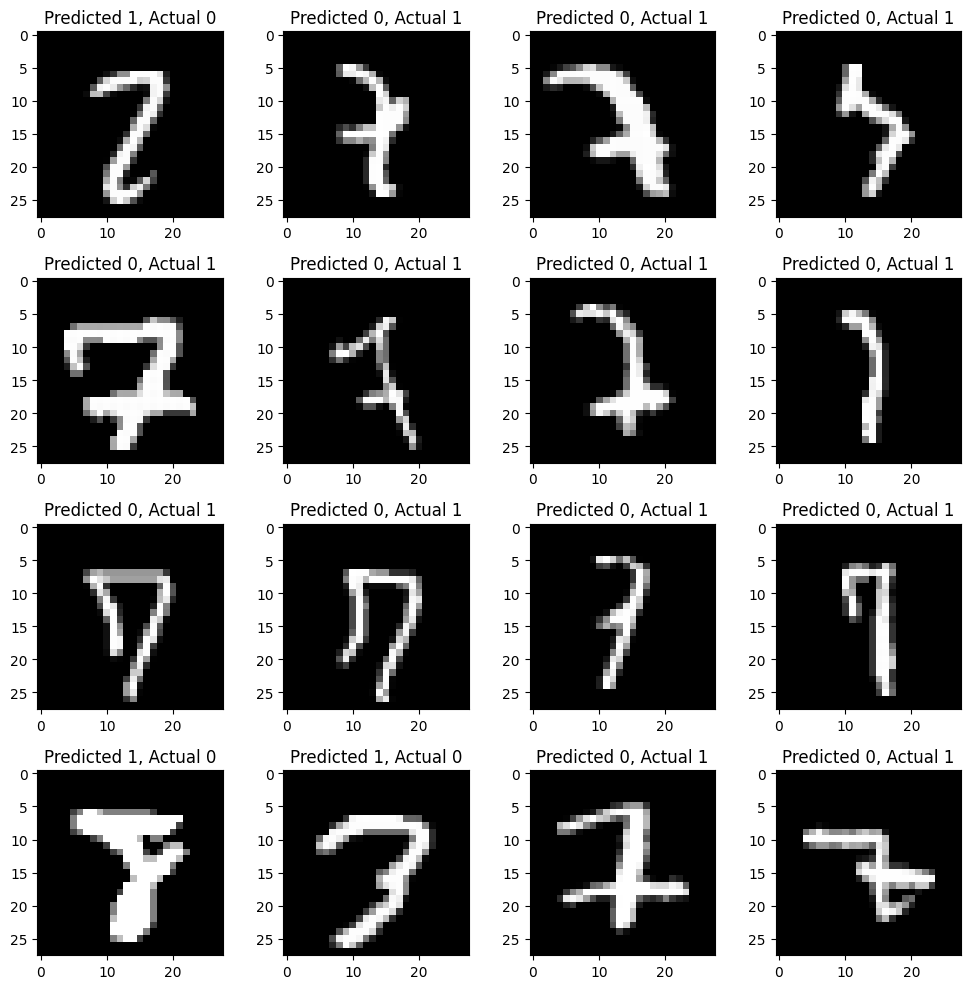

In [12]:
# Predict probabilities for the binary classification
predictions = model.predict(X_test)

# Convert probabilities to binary class predictions (0 or 1) using a threshold of 0.5
# .flatten() is used to convert the (num_samples, 1) shape to (num_samples,)
predicted_classes_binary = (predictions > 0.5).astype(int).flatten()

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes_binary == y_test_binary)[0]
incorrect_indices = np.nonzero(predicted_classes_binary != y_test_binary)[0]

# Plotting correct predictions
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(predicted_classes_binary[correct], y_test_binary[correct]))

plt.tight_layout()

# Plotting incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(predicted_classes_binary[incorrect], y_test_binary[incorrect]))

plt.tight_layout()